In [1]:
#Import packages
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

import matplotlib.pyplot as plt
import contextily as cx
import mplleaflet
import folium

import pprint

**Data Set Up**

In [24]:
# read in the metadata record for the ccb hydrophone deployments
ccb = pd.read_csv("Z:\CFalvo_GIS\MP\Data\Acoustic\CCBMetadata_Feb8.csv")
ccb.head()

,c_recordOnDays,c_uniqueUnitID,deployDate,deploymentDepth_Meters,dutyCycle_Flag,latitudeDeployed_DecDeg,longitudeDeployed_DecDeg,recoveryDate,samplingRate_Hz
0,71,2011_BRP_CCB_S1016_Dep20_20110217_PU0205_FD020...,02/17/2011,37.2,N,41.9412,-70.2880,05/08/2011,5000
1,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0206_FD020...,02/17/2011,30.5,N,41.8771,-70.2540,05/08/2011,5000
2,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0207_FD020...,02/17/2011,30.9,N,41.8948,-70.4439,05/08/2011,5000
3,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0208_FD020...,02/17/2011,32.1,N,41.9334,-70.1859,05/08/2011,5000
4,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0209_FD020...,02/17/2011,42.1,N,41.9508,-70.3901,05/08/2011,5000


In [26]:
ccb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   c_recordOnDays            38 non-null     int64  
 1   c_uniqueUnitID            38 non-null     object 
 2   deployDate                38 non-null     object 
 3   deploymentDepth_Meters    30 non-null     float64
 4   dutyCycle_Flag            38 non-null     object 
 5   latitudeDeployed_DecDeg   38 non-null     float64
 6   longitudeDeployed_DecDeg  38 non-null     float64
 7   recoveryDate              38 non-null     object 
 8   samplingRate_Hz           38 non-null     int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 2.8+ KB


In [27]:
# convert deployDate and recoveryDate to datetime objects
ccb['deployDate'] = pd.to_datetime(ccb['deployDate'])
ccb['recoveryDate'] = pd.to_datetime(ccb['recoveryDate'])

In [28]:
# create separate fields for deployment day, month and year
ccb['depYear'] = ccb['deployDate'].dt.year
ccb['depMonth'] = ccb['deployDate'].dt.month
ccb['depDay'] = ccb['deployDate'].dt.day 

# create separate fields for recovery day, month and year
ccb['recYear'] = ccb['recoveryDate'].dt.year
ccb['recMonth'] = ccb['recoveryDate'].dt.month
ccb['recDay'] = ccb['recoveryDate'].dt.day 

ccb.head()

,c_recordOnDays,c_uniqueUnitID,deployDate,deploymentDepth_Meters,dutyCycle_Flag,latitudeDeployed_DecDeg,longitudeDeployed_DecDeg,recoveryDate,samplingRate_Hz,depYear,depMonth,depDay,recYear,recMonth,recDay
0,71,2011_BRP_CCB_S1016_Dep20_20110217_PU0205_FD020...,2011-02-17,37.2,N,41.9412,-70.2880,2011-05-08,5000,2011,2,17,2011,5,8
1,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0206_FD020...,2011-02-17,30.5,N,41.8771,-70.2540,2011-05-08,5000,2011,2,17,2011,5,8
2,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0207_FD020...,2011-02-17,30.9,N,41.8948,-70.4439,2011-05-08,5000,2011,2,17,2011,5,8
3,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0208_FD020...,2011-02-17,32.1,N,41.9334,-70.1859,2011-05-08,5000,2011,2,17,2011,5,8
4,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0209_FD020...,2011-02-17,42.1,N,41.9508,-70.3901,2011-05-08,5000,2011,2,17,2011,5,8


In [29]:
# separate out 2011 into its own dataframe
deployments_2011 = ccb[ccb.depYear == 2011]
deployments_2011

,c_recordOnDays,c_uniqueUnitID,deployDate,deploymentDepth_Meters,dutyCycle_Flag,latitudeDeployed_DecDeg,longitudeDeployed_DecDeg,recoveryDate,samplingRate_Hz,depYear,depMonth,depDay,recYear,recMonth,recDay
0,71,2011_BRP_CCB_S1016_Dep20_20110217_PU0205_FD020...,2011-02-17,37.2,N,41.9412,-70.2880,2011-05-08,5000,2011,2,17,2011,5,8
1,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0206_FD020...,2011-02-17,30.5,N,41.8771,-70.2540,2011-05-08,5000,2011,2,17,2011,5,8
2,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0207_FD020...,2011-02-17,30.9,N,41.8948,-70.4439,2011-05-08,5000,2011,2,17,2011,5,8
3,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0208_FD020...,2011-02-17,32.1,N,41.9334,-70.1859,2011-05-08,5000,2011,2,17,2011,5,8
4,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0209_FD020...,2011-02-17,42.1,N,41.9508,-70.3901,2011-05-08,5000,2011,2,17,2011,5,8
5,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0211_FD020...,2011-02-17,36.4,N,41.9711,-70.4765,2011-05-08,5000,2011,2,17,2011,5,8
6,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0212_FD020...,2011-02-17,40.5,N,41.9931,-70.2201,2011-05-08,5000,2011,2,17,2011,5,8
7,80,2011_BRP_CCB_S1016_Dep20_20110217_PU0213_FD020...,2011-02-17,31.0,N,41.8762,-70.3412,2011-05-08,5000,2011,2,17,2011,5,8


In [30]:
deployments_2011.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   c_recordOnDays            8 non-null      int64         
 1   c_uniqueUnitID            8 non-null      object        
 2   deployDate                8 non-null      datetime64[ns]
 3   deploymentDepth_Meters    8 non-null      float64       
 4   dutyCycle_Flag            8 non-null      object        
 5   latitudeDeployed_DecDeg   8 non-null      float64       
 6   longitudeDeployed_DecDeg  8 non-null      float64       
 7   recoveryDate              8 non-null      datetime64[ns]
 8   samplingRate_Hz           8 non-null      int64         
 9   depYear                   8 non-null      int64         
 10  depMonth                  8 non-null      int64         
 11  depDay                    8 non-null      int64         
 12  recYear                   

In [11]:
# create a timespan for every day in 2011
timespan_2011 = pd.Series(pd.date_range("2011", freq="D", periods=365))

In [38]:
t = pd.date_range('02/17/2011', '05/08/2011', freq = 'D')

for x in t:
    print(x)

2011-02-17 00:00:00
2011-02-18 00:00:00
2011-02-19 00:00:00
2011-02-20 00:00:00
2011-02-21 00:00:00
2011-02-22 00:00:00
2011-02-23 00:00:00
2011-02-24 00:00:00
2011-02-25 00:00:00
2011-02-26 00:00:00
2011-02-27 00:00:00
2011-02-28 00:00:00
2011-03-01 00:00:00
2011-03-02 00:00:00
2011-03-03 00:00:00
2011-03-04 00:00:00
2011-03-05 00:00:00
2011-03-06 00:00:00
2011-03-07 00:00:00
2011-03-08 00:00:00
2011-03-09 00:00:00
2011-03-10 00:00:00
2011-03-11 00:00:00
2011-03-12 00:00:00
2011-03-13 00:00:00
2011-03-14 00:00:00
2011-03-15 00:00:00
2011-03-16 00:00:00
2011-03-17 00:00:00
2011-03-18 00:00:00
2011-03-19 00:00:00
2011-03-20 00:00:00
2011-03-21 00:00:00
2011-03-22 00:00:00
2011-03-23 00:00:00
2011-03-24 00:00:00
2011-03-25 00:00:00
2011-03-26 00:00:00
2011-03-27 00:00:00
2011-03-28 00:00:00
2011-03-29 00:00:00
2011-03-30 00:00:00
2011-03-31 00:00:00
2011-04-01 00:00:00
2011-04-02 00:00:00
2011-04-03 00:00:00
2011-04-04 00:00:00
2011-04-05 00:00:00
2011-04-06 00:00:00
2011-04-07 00:00:00


In [32]:
# date range
for record in deployments_2011:
    startDate = deployments_2011['deployDate']
    endDate = deployments_2011['recoveryDate']
    pd.date_range(startDate, endDate, freq = 'M')
    

TypeError: Cannot convert input [0   2011-02-17
1   2011-02-17
2   2011-02-17
3   2011-02-17
4   2011-02-17
5   2011-02-17
6   2011-02-17
7   2011-02-17
Name: deployDate, dtype: datetime64[ns]] of type <class 'pandas.core.series.Series'> to Timestamp

In [ ]:
for day in timespan_2011:
    if

**Temporal Plotting**

In [8]:
# sample code from https://pythonhosted.org/calmap/#calmap.calendarplot 
import numpy as np; np.random.seed(sum(map(ord, 'calmap')))
import pandas as pd
import calmap

In [9]:
all_days = pd.date_range('1/1/2011', periods=365, freq='D')
days = np.random.choice(all_days, 100)
events = pd.Series(np.random.randn(len(days)), index=days)

C:\Users\cif3\AppData\Local\ESRI\conda\envs\gis\lib\site-packages\calmap\__init__.py:181: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  "week": by_day.index.week,


KeyError: datetime.date(2011, 2, 15)

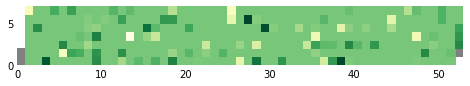

In [11]:
calmap.calendarplot(events, monthticks=3, daylabels='MTWTFSS',
                    dayticks=[0, 2, 4, 6], cmap='YlGn',
                    fillcolor='grey', linewidth=0,
                    fig_kws=dict(figsize=(8, 4)))

**Spatial Plotting**

In [ ]:
#Create a geodataframe from our data
geom = [Point(xyz) for xyz in zip(dfNWIS['lng'],dfNWIS['lat'],dfNWIS['alt'])]
gdfNWIS = gpd.GeoDataFrame(dfNWIS,geometry=geom,crs=4269)

In [3]:
# create geodataframe
geom = [Point(xy) for xy in zip(ccb['longitudeDeployed_DecDeg'],ccb['latitudeDeployed_DecDeg'])]
ccb_gdf = gpd.GeoDataFrame(ccb, geometry = geom, crs = 4269)

<AxesSubplot:>

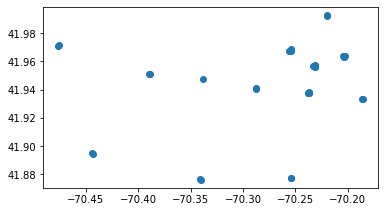

In [4]:
ccb_gdf.plot()